Objective of this experiment: compare three topologies with all-shortest-path routing

networks included: 

========slimfly==========: 
(722, 28), (1058, 34)

========jellyfish========:
(722, 28), (800,31), (900,32), (1058, 34)

========== GDBG =========:
(722, 28 * 2), (800,31 * 2), (900,32 * 2), (1058, 34 * 2)

========Equality=========: 
E441: N900k32p12 ahops:[−1,1,23,25,55,121,135,165,177,333,457,475,495,543,549,557,585,615,717, 727] bhops:(70,130,194,256,320,360)

E442: N1000k33p11 ahops:[−1, 1, 27, 39, 45, 105, 215, 327, 365, 401, 455, 491, 523, 545, 547, 605, 653, 701, 715, 771, 801, 813, 865, 875, 955] bhops:(70, 180, 320, 430)

E443 (fault on the Equality paper!): N800k31p13 ahops:[−1, 1, 27, 39, 45, 105, 215, 327, 365, 401, 455, 491, 523, 545, 547, 605, 653, 701, 715, 771, 801, 813, 865, 875, 955] bhops:(70, 180, 320, 430)



In [1]:
import matplotlib.pyplot as plt
# import networkx as nx
# import topologies.Equality as Equality
# import topologies.RRG as RRG
# import topologies.Slimfly as Slimfly
from globals import *
from statistics import mean
import sys
import pickle

The pickled data structure is a dictionary:

"diameter": diameter, 

"ave_path_length_statistics": [average_path_length_min, average_path_length_mean, average_path_length_max],

"num_paths_statistics": [_num_paths_min, _num_paths_mean, _num_paths_max]

"link_load_statistics": [_load_min, _load_mean, _load_max]

"s_d_bw_statistics": [s_d_bw_min, s_d_bw_mean, s_d_bw_max]

In [2]:
topos=['jellyfish', 'slimfly', 'equality' ,'gdbg']
configs={'jellyfish': jf_configs, 
         'slimfly': sf_configs, 
         'equality': [ i[-1] for i in eq_configs],
         'gdbg': gdbg_configs }
colors={'jellyfish': 'red', 
         'slimfly': 'blue', 
         'equality': 'black',
         'gdbg': 'green' }
num_vertices={'jellyfish': [ i[0]+2 for i in jf_configs], 
         'slimfly': [ i[0]-2 for i in sf_configs], 
         'equality': [ i[0] for i in eq_configs],
         'gdbg': [ i[0]+5 for i in gdbg_configs],
         'jellyfish-8shortest': [ i[0]+10 for i in jf_configs],
         'gdbg-allpath_H': [ i[0]+12 for i in gdbg_configs]
            }

# 1. Diameter

# 2. Average path lengths

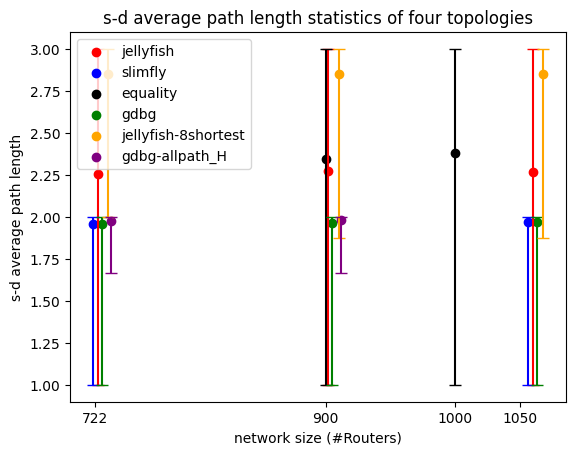

In [3]:
topic='ave_path_length_statistics'

for topo in topos:
    x_ = []
    y_ave_ = []
    y_min_ = []
    y_max_ = []
    for i, config in enumerate(configs[topo]):
        result = pickle.load(open(f'pickled_data/statistics/all_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
        x_.append(num_vertices[topo][i])
        (_min, _ave, _max) = result[topic]
        y_min_.append(_min)
        y_ave_.append(_ave)
        y_max_.append(_max)
    # Create the scatter plot
    plt.scatter(x_, y_ave_, color=colors[topo], label=topo)
    # Create the error bars
    for i in range(len(x_)):
        plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor=colors[topo], capsize=4)


topo="jellyfish"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    result = pickle.load(open(f'pickled_data/statistics/8_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['jellyfish-8shortest'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='orange', label='jellyfish-8shortest')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='orange', capsize=4)


topo="gdbg"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    #=====temporary====
    if i == 2:
        continue
    #==================
    result = pickle.load(open(f'pickled_data/statistics/ALLPATH_2_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['gdbg-allpath_H'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='purple', label='gdbg-allpath_H')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='purple', capsize=4)


# Add labels and title
plt.xlabel('network size (#Routers)')
plt.ylabel('s-d average path length')
plt.title('s-d average path length statistics of four topologies')
plt.legend(loc='upper left')

# Define the positions and labels for the selected xticks
selected_xticks_positions = [722, 900, 1000, 1050]
selected_xticks_labels = ['722', '900', '1000', '1050']
# Set the xticks using the defined positions and labels
plt.xticks(selected_xticks_positions, selected_xticks_labels)
# Show the plot
plt.show()

# 3. path diversity

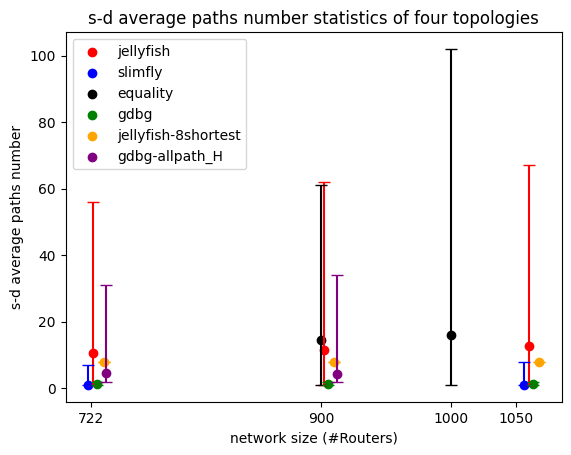

In [4]:
topic='num_paths_statistics'

for topo in topos:
    x_ = []
    y_ave_ = []
    y_min_ = []
    y_max_ = []
    for i, config in enumerate(configs[topo]):
        result = pickle.load(open(f'pickled_data/statistics/all_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
        x_.append(num_vertices[topo][i])
        (_min, _ave, _max) = result[topic]
        y_min_.append(_min)
        y_ave_.append(_ave)
        y_max_.append(_max)
    # Create the scatter plot
    plt.scatter(x_, y_ave_, color=colors[topo], label=topo)
    # Create the error bars
    for i in range(len(x_)):
        plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor=colors[topo], capsize=4)


topo="jellyfish"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    result = pickle.load(open(f'pickled_data/statistics/8_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['jellyfish-8shortest'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='orange', label='jellyfish-8shortest')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='orange', capsize=4)


topo="gdbg"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    #=====temporary====
    if i == 2:
        continue
    #==================
    result = pickle.load(open(f'pickled_data/statistics/ALLPATH_2_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['gdbg-allpath_H'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='purple', label='gdbg-allpath_H')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='purple', capsize=4)


# Add labels and title
plt.xlabel('network size (#Routers)')
plt.ylabel('s-d average paths number')
plt.title('s-d average paths number statistics of four topologies')
plt.legend(loc='upper left')
# Define the positions and labels for the selected xticks
selected_xticks_positions = [722, 900, 1000, 1050]
selected_xticks_labels = ['722', '900', '1000', '1050']
# Set the xticks using the defined positions and labels
plt.xticks(selected_xticks_positions, selected_xticks_labels)
# Show the plot
plt.show()

# 3(2) disjoint path counts


In [5]:
# for topo in topos:
#     x_ = []
#     y_ave_ = []
#     y_min_ = []
#     y_max_ = []
#     for i, config in enumerate(configs[topo]):
#         path_dict = pickle.load(open(f'pickled_data/graphs_and_paths/all_shortest_paths_{config}_{topo}_paths.pickle', 'rb'))
#         num_disjoint_paths = count_disjoint_paths(path_dict)
#         x_.append(num_vertices[topo][i])
#         y_min_.append(min(num_disjoint_paths))
#         y_ave_.append(mean(num_disjoint_paths))
#         y_max_.append(max(num_disjoint_paths))
#     # Create the scatter plot
#     plt.scatter(x_, y_ave_, color=colors[topo], label=topo)
#     # Create the error bars
#     for i in range(len(x_)):
#         plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor=colors[topo], capsize=4)

# # Add labels and title
# plt.xlabel('network size (#Routers)')
# plt.ylabel('s-d average disjoint paths number')
# plt.title('s-d average disjoint paths number statistics of four topologies')
# plt.legend(loc='upper left')
# # Define the positions and labels for the selected xticks
# selected_xticks_positions = [722, 900, 1000, 1050]
# selected_xticks_labels = ['722', '900', '1000', '1050']
# # Set the xticks using the defined positions and labels
# plt.xticks(selected_xticks_positions, selected_xticks_labels)
# # Show the plot
# plt.show()

# 4. link load distribution

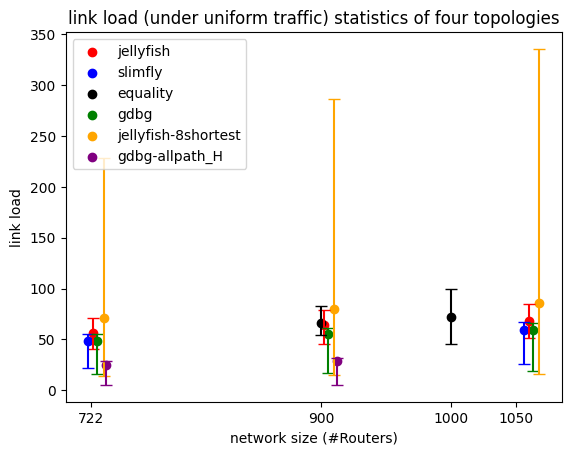

In [6]:
topic='link_load_statistics'

for topo in topos:
    x_ = []
    y_ave_ = []
    y_min_ = []
    y_max_ = []
    for i, config in enumerate(configs[topo]):
        result = pickle.load(open(f'pickled_data/statistics/all_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
        x_.append(num_vertices[topo][i])
        (_min, _ave, _max) = result[topic]
        y_min_.append(_min)
        y_ave_.append(_ave)
        y_max_.append(_max)
    # Create the scatter plot
    plt.scatter(x_, y_ave_, color=colors[topo], label=topo)
    # Create the error bars
    for i in range(len(x_)):
        plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor=colors[topo], capsize=4)



topo="jellyfish"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    result = pickle.load(open(f'pickled_data/statistics/8_shortest_paths_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['jellyfish-8shortest'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='orange', label='jellyfish-8shortest')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='orange', capsize=4)


topo="gdbg"
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for i, config in enumerate(configs[topo]):
    #=====temporary====
    if i == 2:
        continue
    #==================
    result = pickle.load(open(f'pickled_data/statistics/ALLPATH_2_{config}_{topo}_uniform_flow.pickle', 'rb'))
    x_.append(num_vertices['gdbg-allpath_H'][i])
    (_min, _ave, _max) = result[topic]
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='purple', label='gdbg-allpath_H')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='purple', capsize=4)



# Add labels and title
plt.xlabel('network size (#Routers)')
plt.ylabel('link load')
plt.title('link load (under uniform traffic) statistics of four topologies')
plt.legend(loc='upper left')
# Define the positions and labels for the selected xticks
selected_xticks_positions = [722, 900, 1000, 1050]
selected_xticks_labels = ['722', '900', '1000', '1050']
# Set the xticks using the defined positions and labels
plt.xticks(selected_xticks_positions, selected_xticks_labels)
# Show the plot
plt.show()

# Including 8-shortest path routing for jellyfish and allpath_H for gdbg